In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("productivity.csv")
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

Cleaning the data

In [3]:
df = df.drop(["date", "department", "idle_time", "idle_men"], axis=1)

In [4]:
df=df.dropna()

In [5]:
df

quarter        day  team  targeted_productivity    smv     wip  \
0     Quarter1   Thursday     8                   0.80  26.16  1108.0   
2     Quarter1   Thursday    11                   0.80  11.41   968.0   
3     Quarter1   Thursday    12                   0.80  11.41   968.0   
4     Quarter1   Thursday     6                   0.80  25.90  1170.0   
5     Quarter1   Thursday     7                   0.80  25.90   984.0   
...        ...        ...   ...                    ...    ...     ...   
1187  Quarter2  Wednesday     4                   0.75  26.82  1054.0   
1188  Quarter2  Wednesday     5                   0.70  26.82   992.0   
1189  Quarter2  Wednesday     8                   0.70  30.48   914.0   
1190  Quarter2  Wednesday     6                   0.70  23.41  1128.0   
1191  Quarter2  Wednesday     7                   0.65  30.48   935.0   

      over_time  incentive  no_of_style_change  no_of_workers  \
0          7080         98                   0           59.0   
2          3660         50                   0           30.5   
3          3660         50                   0           30.5   
4          1920         50                   0           56.0   
5          6720         38                   0           56.0   
...         ...        ...                 ...            ...   
1187       7080         45                   0           59.0   
1188       6960         30                   1           58.0   
1189       6840         30                   1           57.0   
1190       4560         40                   1           38.0   
1191       6840         26                   1           57.0   

      actual_productivity  
0                0.940725  
2                0.800570  
3                0.800570  
4                0.800382  
5                0.800125  
...                   ...  
1187             0.750051  
1188             0.700557  
1189             0.700505  
1190             0.700246  
1191             0.650596  

[691 rows x 11 columns]

In [6]:
df

quarter        day  team  targeted_productivity    smv     wip  \
0     Quarter1   Thursday     8                   0.80  26.16  1108.0   
2     Quarter1   Thursday    11                   0.80  11.41   968.0   
3     Quarter1   Thursday    12                   0.80  11.41   968.0   
4     Quarter1   Thursday     6                   0.80  25.90  1170.0   
5     Quarter1   Thursday     7                   0.80  25.90   984.0   
...        ...        ...   ...                    ...    ...     ...   
1187  Quarter2  Wednesday     4                   0.75  26.82  1054.0   
1188  Quarter2  Wednesday     5                   0.70  26.82   992.0   
1189  Quarter2  Wednesday     8                   0.70  30.48   914.0   
1190  Quarter2  Wednesday     6                   0.70  23.41  1128.0   
1191  Quarter2  Wednesday     7                   0.65  30.48   935.0   

      over_time  incentive  no_of_style_change  no_of_workers  \
0          7080         98                   0           59.0   
2          3660         50                   0           30.5   
3          3660         50                   0           30.5   
4          1920         50                   0           56.0   
5          6720         38                   0           56.0   
...         ...        ...                 ...            ...   
1187       7080         45                   0           59.0   
1188       6960         30                   1           58.0   
1189       6840         30                   1           57.0   
1190       4560         40                   1           38.0   
1191       6840         26                   1           57.0   

      actual_productivity  
0                0.940725  
2                0.800570  
3                0.800570  
4                0.800382  
5                0.800125  
...                   ...  
1187             0.750051  
1188             0.700557  
1189             0.700505  
1190             0.700246  
1191             0.650596  

[691 rows x 11 columns]

In [7]:
#descriptive analytics
df.describe()

team  targeted_productivity         smv           wip  \
count  691.000000             691.000000  691.000000    691.000000   
mean     6.520984               0.723980   23.245412   1190.465991   
std      3.458333               0.102006    6.976497   1837.455001   
min      1.000000               0.070000   10.050000      7.000000   
25%      4.000000               0.700000   18.790000    774.500000   
50%      6.000000               0.750000   22.520000   1039.000000   
75%     10.000000               0.800000   28.080000   1252.500000   
max     12.000000               0.800000   54.560000  23122.000000   

          over_time   incentive  no_of_style_change  no_of_workers  \
count    691.000000  691.000000          691.000000     691.000000   
mean    6508.205499   44.483357            0.260492      52.445731   
std     2864.505604   27.596591            0.537185       9.417353   
min        0.000000    0.000000            0.000000      26.000000   
25%     4560.000000   30.000000            0.000000      52.000000   
50%     6840.000000   45.000000            0.000000      57.000000   
75%     7200.000000   60.000000            0.000000      58.000000   
max    25920.000000  138.000000            2.000000      89.000000   

       actual_productivity  
count           691.000000  
mean              0.722013  
std               0.154784  
min               0.233705  
25%               0.661470  
50%               0.750608  
75%               0.800402  
max               1.100484

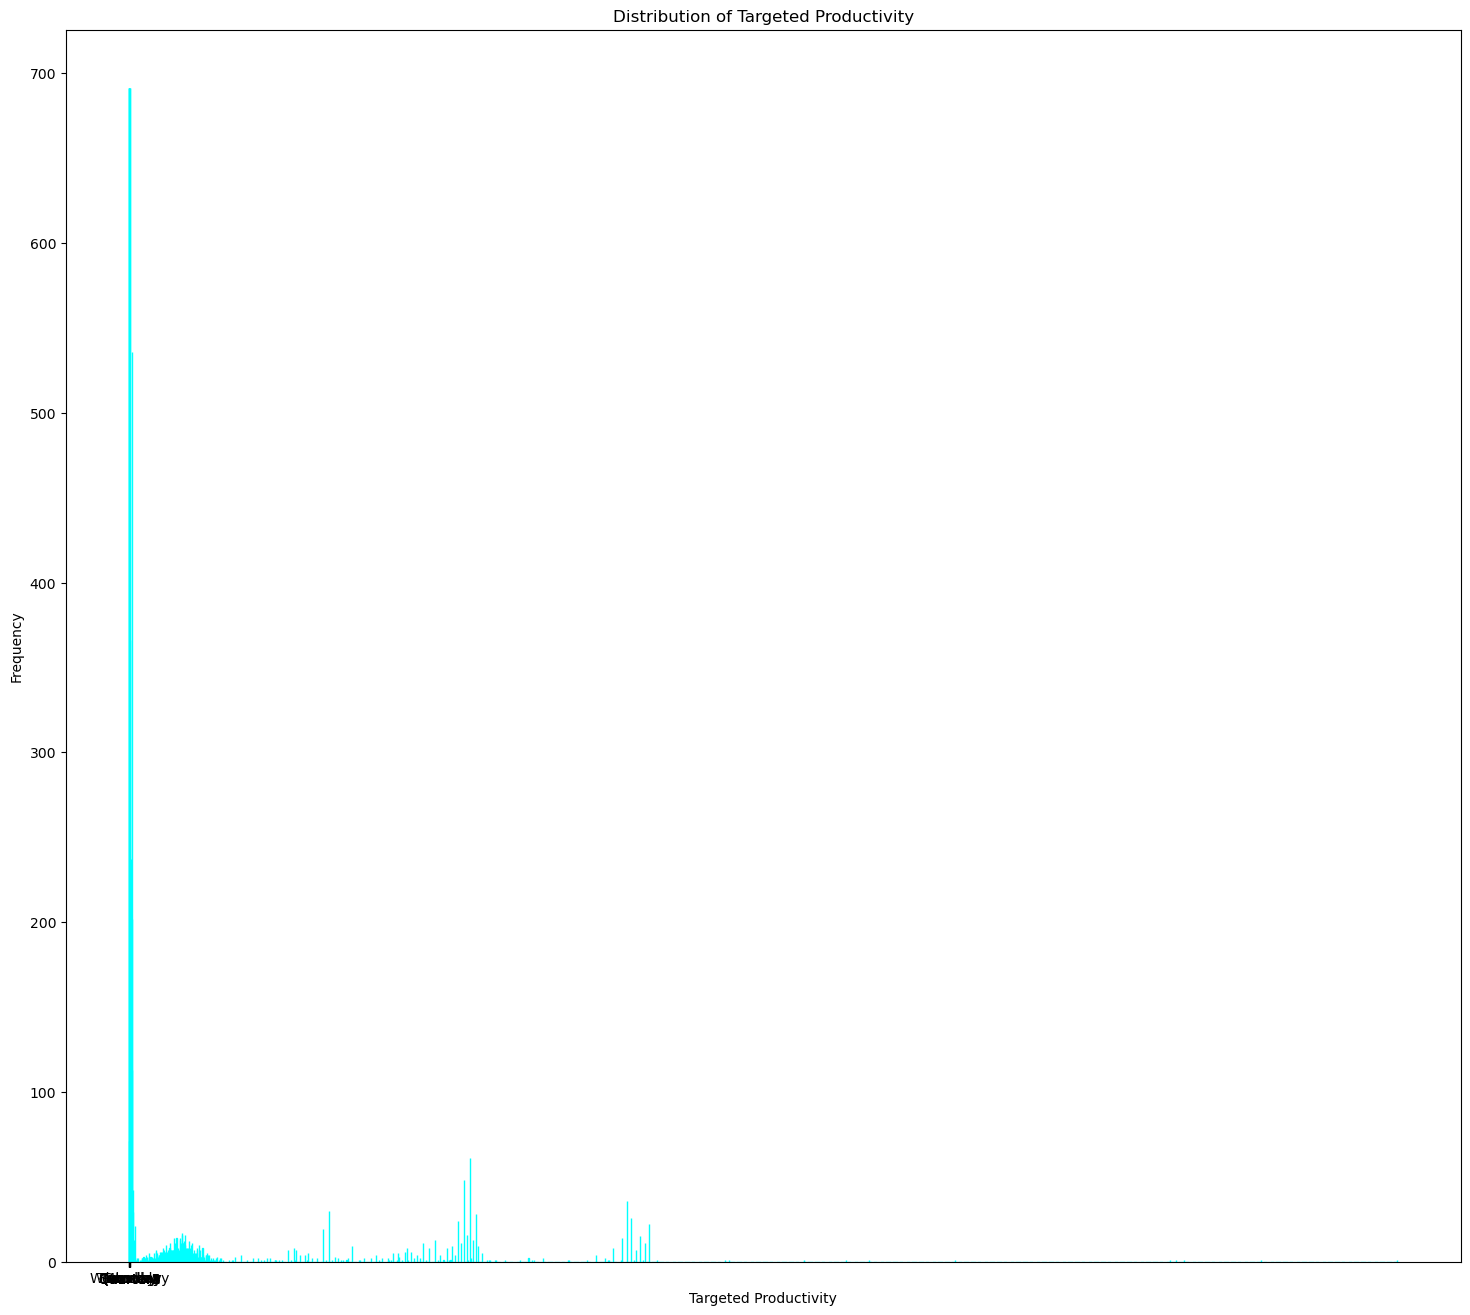

In [8]:
plt.figure(figsize=(18, 16))
plt.hist(df, bins=2000, edgecolor="cyan")
plt.xlabel("Targeted Productivity")
plt.ylabel("Frequency")
plt.title("Distribution of Targeted Productivity")
plt.show()

<Figure size 1000x800 with 0 Axes>

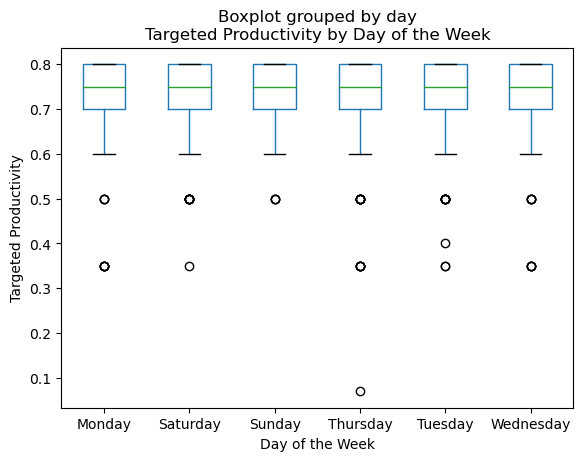

In [9]:
plt.figure(figsize=(10, 8))
df.boxplot(column="targeted_productivity", by="day", grid=False)
plt.xlabel("Day of the Week")
plt.ylabel("Targeted Productivity")
plt.title("Targeted Productivity by Day of the Week")
plt.show()

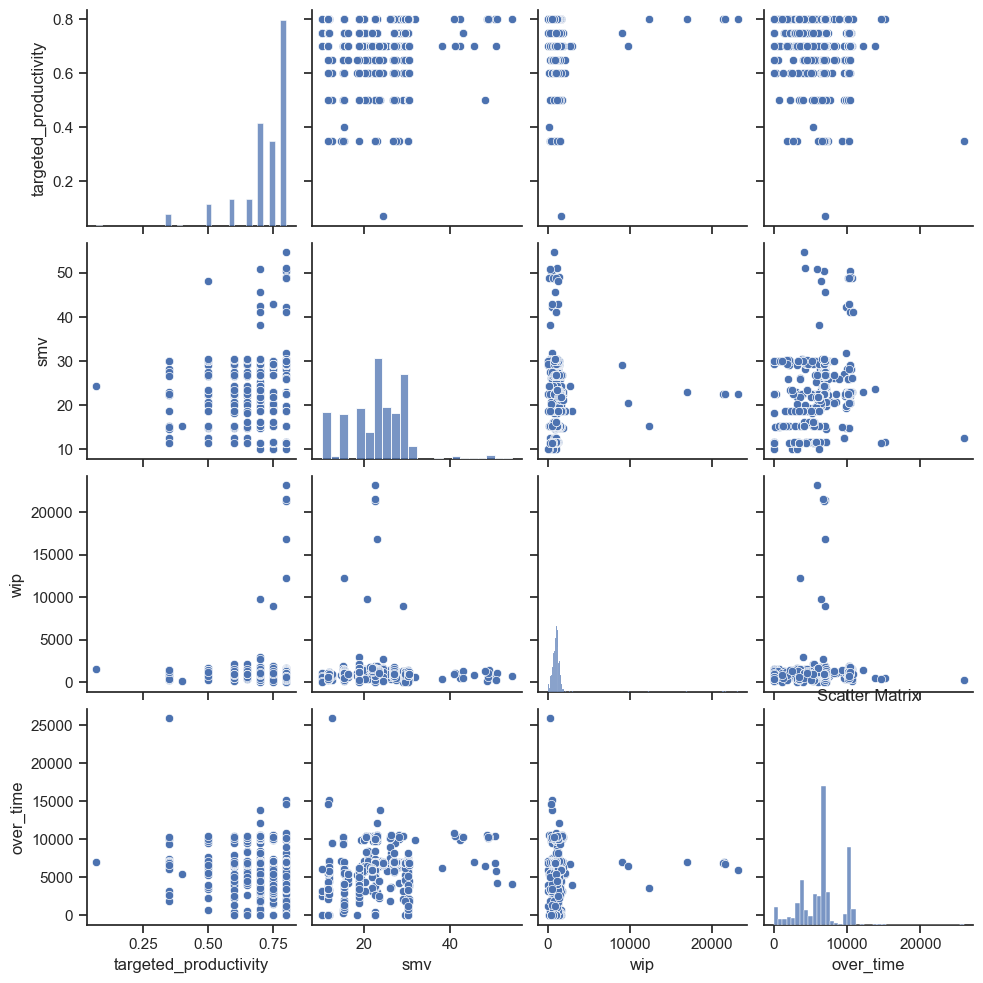

In [10]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, vars=["targeted_productivity", "smv", "wip", "over_time"])
plt.title("Scatter Matrix")
plt.show()

C:\Users\varun\AppData\Local\Temp\ipykernel_14896\1695290508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


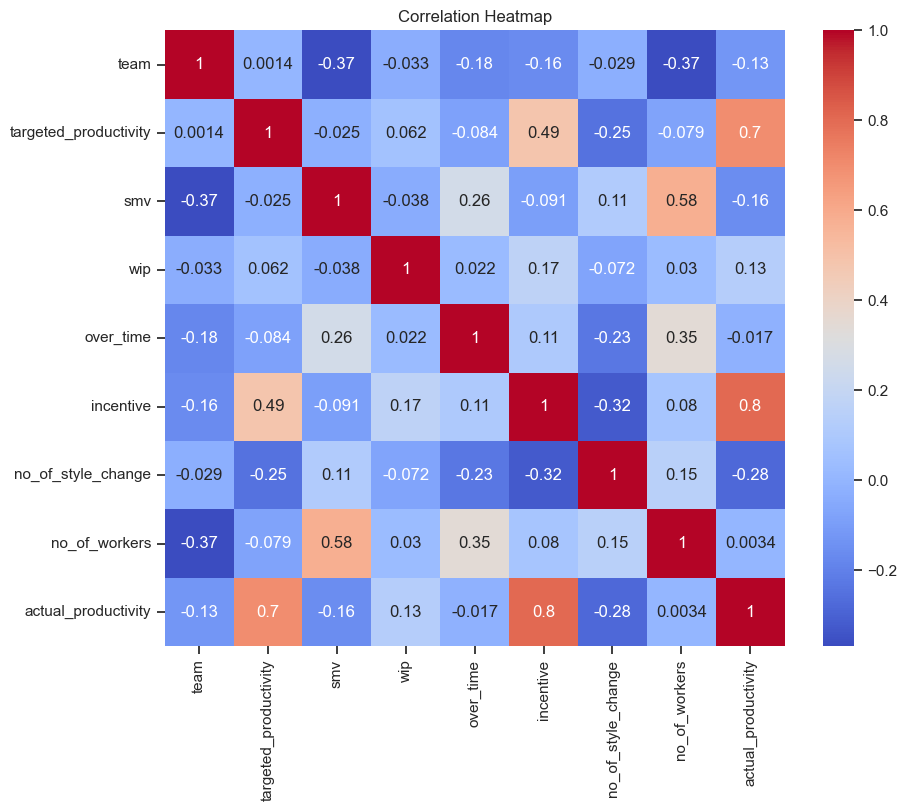

In [11]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
import plotly.express as px
fig = px.line(df, x='over_time', y='targeted_productivity', title='Targeted Productivity over Time')
fig.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=df['wip'],
    y=df['over_time'],
    z=df['targeted_productivity'],
    mode='markers',
    marker=dict(
        size=7,
        color=df['targeted_productivity'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='WIP',
    yaxis_title='Overtime',
    zaxis_title='Targeted Productivity'
))

fig.show()


In [14]:
day_avg_productivity = df.groupby("day")["targeted_productivity"].mean()

fig = px.bar(day_avg_productivity, x=day_avg_productivity.index, y=day_avg_productivity.values,
             labels={'x': 'Day of the Week', 'y': 'Average Targeted Productivity'},
             title='Day of the Week vs. Average Targeted Productivity')

fig.show()


In [15]:
fig = px.violin(df, x="quarter", y="targeted_productivity", box=True, points="all", title="Targeted Productivity by Quarter")
fig.show()

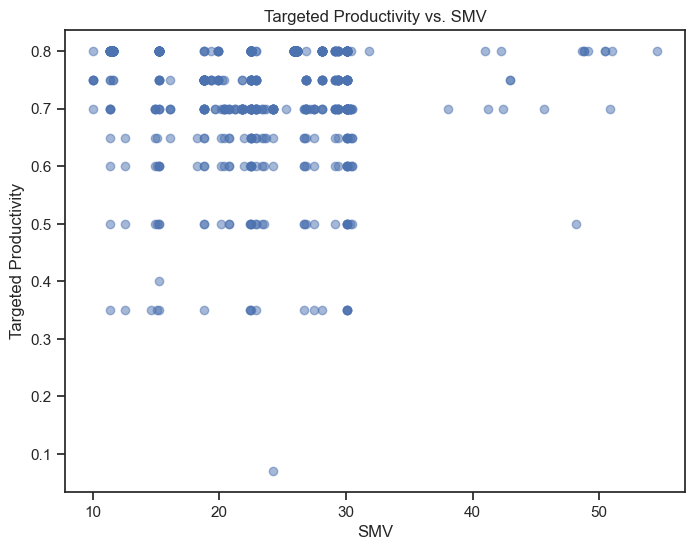

In [16]:
smv = df["smv"]

plt.figure(figsize=(8, 6))
plt.scatter(smv, df["targeted_productivity"], alpha=0.5)
plt.xlabel("SMV")
plt.ylabel("Targeted Productivity")
plt.title("Targeted Productivity vs. SMV")
plt.show()

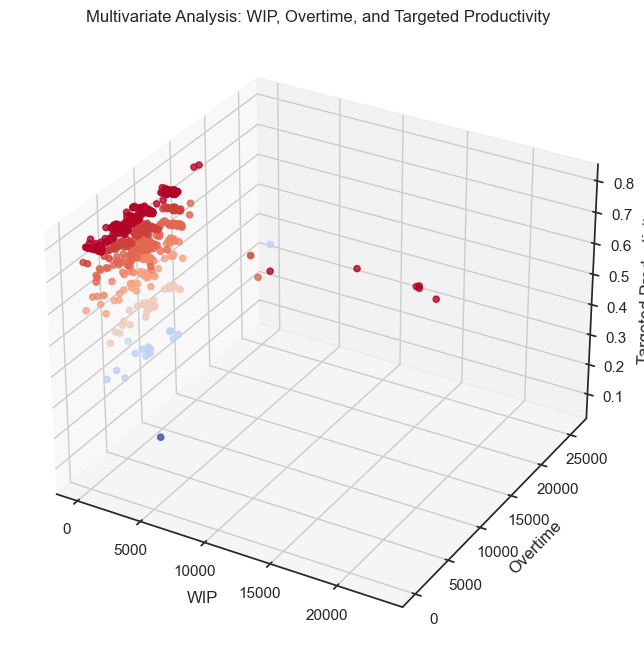

In [17]:
wip = df["wip"]
overtime = df["over_time"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(wip, overtime, df["targeted_productivity"], c=df["targeted_productivity"], cmap="coolwarm", alpha=0.8)
ax.set_xlabel("WIP")
ax.set_ylabel("Overtime")
ax.set_zlabel("Targeted Productivity")
ax.set_title("Multivariate Analysis: WIP, Overtime, and Targeted Productivity")
plt.show()

In [18]:
df_encoded = pd.get_dummies(df, columns=["quarter", "day"])

X = df_encoded.drop("targeted_productivity", axis=1)
y = df_encoded["targeted_productivity"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

In [21]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [22]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

In [23]:
import xgboost as xgb


In [25]:
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [26]:
ridge_reg = Ridge(random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [27]:
lasso_reg = Lasso(random_state=42)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [28]:
models = {
    "Linear Regression": linear_reg,
    "Random Forest Regression": rf_reg,
    "Gradient Boosting Regression": gb_reg,
    "XGBoost Regression": xgb_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg
}

In [29]:
for model_name, model in models.items():
    if isinstance(model, tuple):
        model = model[0]
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(model_name + ":")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print()

Linear Regression:
Mean Squared Error: 0.003210182663318872
R2 Score: 0.5294443574995531

Random Forest Regression:
Mean Squared Error: 0.001759667985611508
R2 Score: 0.7420639924891895

Gradient Boosting Regression:
Mean Squared Error: 0.0018770926212119607
R2 Score: 0.7248516308744688

XGBoost Regression:
Mean Squared Error: 0.00247389937399763
R2 Score: 0.6373703830892331

Ridge Regression:
Mean Squared Error: 0.003165635857099182
R2 Score: 0.5359741264318848

Lasso Regression:
Mean Squared Error: 0.005841643147073671
R2 Score: 0.1437190862255493



In [30]:
best_model = max(models, key=lambda x: r2_score(y_test, models[x].predict(X_test)))
print("Best Model:", best_model)

Best Model: Random Forest Regression


In [31]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [32]:
import joblib

In [33]:
best_model_name = max(models, key=lambda x: r2_score(y_test, models[x].predict(X_test)))
best_model = models[best_model_name]

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']